In [ ]:
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

path = '/content/drive/MyDrive/Mineração de Dados/IF998 - Missões SMD/Projeto/'

# Importando modelo
Vamos utilizar o classificador VotingClassifier, visto que ele obteve os melhores resultados nos testes realizados.

In [ ]:
with open(path+'VOTING_model.pkl','rb') as f:
    voting_model = pickle.load(f)[0]

# Importando base de dados
Vamos importar a base de dados que possui somente perfis com gênero desconhecido para realizar as predições dos seus respectivos gêneros

In [ ]:
df = pd.read_csv(path+'data_predict.csv')
df.drop(columns=['Unnamed: 0', 'gender'], inplace = True)
df.head()

,firstDay,lastDay,NEds,NDays,NActDays,NPages,NPcreated,pagesWomen,wikiprojWomen,ns_user,ns_wikipedia,ns_talk,ns_userTalk,ns_content
0,0.309966,0.905316,0.094197,0.230836,0.884603,0.009702,-0.122675,-0.082393,-0.024674,0.104014,0.311440,0.617321,1.009083,0.000675
1,-0.827711,-0.788145,-0.236891,0.569913,-0.417553,-0.168245,-0.146215,-0.082393,-0.024674,-0.196334,-0.114795,-0.208544,-0.132268,-0.231191
2,0.890181,-1.383145,-0.253189,-1.516946,-0.471029,-0.201628,-0.142852,-0.082393,-0.024674,-0.261274,-0.132629,-0.213183,-0.165297,-0.243489
3,0.315654,0.344643,-0.239971,-0.055845,-0.382793,-0.192984,-0.146215,-0.082393,-0.024674,-0.155746,-0.132629,-0.073993,-0.124928,-0.239718
4,0.045456,-0.238914,-0.250109,-0.215279,-0.388141,-0.195369,-0.146215,-0.082393,-0.024674,-0.167922,-0.132629,-0.231742,-0.176307,-0.244637


In [ ]:
pred = voting_model.predict(df)
pred

array([1, 1, 2, ..., 1, 1, 1])

In [ ]:
df_pred = pd.DataFrame(data=pred, columns = ['gender_ml'])
df_final = pd.concat([df, df_pred], axis=1)

In [ ]:
df_final.head()

,firstDay,lastDay,NEds,NDays,NActDays,NPages,NPcreated,pagesWomen,wikiprojWomen,ns_user,ns_wikipedia,ns_talk,ns_userTalk,ns_content,gender_ml
0,0.309966,0.905316,0.094197,0.230836,0.884603,0.009702,-0.122675,-0.082393,-0.024674,0.104014,0.311440,0.617321,1.009083,0.000675,1
1,-0.827711,-0.788145,-0.236891,0.569913,-0.417553,-0.168245,-0.146215,-0.082393,-0.024674,-0.196334,-0.114795,-0.208544,-0.132268,-0.231191,1
2,0.890181,-1.383145,-0.253189,-1.516946,-0.471029,-0.201628,-0.142852,-0.082393,-0.024674,-0.261274,-0.132629,-0.213183,-0.165297,-0.243489,2
3,0.315654,0.344643,-0.239971,-0.055845,-0.382793,-0.192984,-0.146215,-0.082393,-0.024674,-0.155746,-0.132629,-0.073993,-0.124928,-0.239718,1
4,0.045456,-0.238914,-0.250109,-0.215279,-0.388141,-0.195369,-0.146215,-0.082393,-0.024674,-0.167922,-0.132629,-0.231742,-0.176307,-0.244637,1


# Análise dos resultados

In [ ]:
attr_previsores = ['firstDay','lastDay','NEds','NDays','NActDays','NPages','NPcreated','pagesWomen','wikiprojWomen','ns_user','ns_wikipedia','ns_talk','ns_userTalk','ns_content']

In [ ]:

df_male   = df_final[df_final['gender_ml'] == 1]
df_female = df_final[df_final['gender_ml'] == 2]

df       = df_final[attr_previsores]
class_df = df_final[['gender_ml']]

## Contagem de instâncias por classe

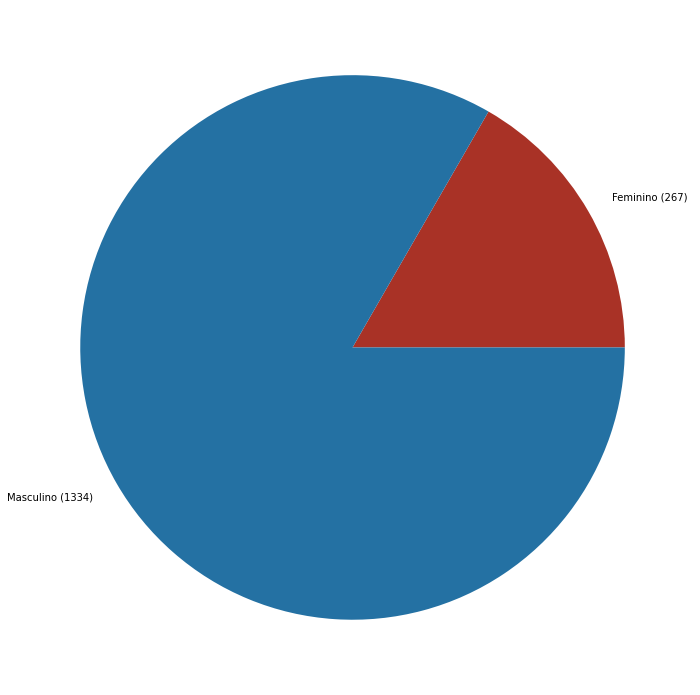

In [ ]:
femaleCount, maleCount = df_female['gender_ml'].count(), df_male['gender_ml'].count()
data = [femaleCount, maleCount]
labels = [f'Feminino ({femaleCount})', f'Masculino ({maleCount})']
colors= ['#A93226', '#2471A3']
 
fig = plt.figure(figsize=(10, 10))
patches, texts = plt.pie(data, labels=labels, colors=colors)

plt.tight_layout()
plt.show()

# Aplicação de PCA (principal component analysis) e visualização dos resultados

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_comp = pca.fit_transform(df)
principal_comp

array([[ 1.12669479,  0.58829589],
       [-0.20177374, -1.11112978],
       [-1.49568472,  1.21235723],
       ...,
       [-0.50044812, -0.90539037],
       [-0.44109386,  0.1753395 ],
       [ 0.15418401,  0.3168795 ]])

In [ ]:
pca_df = pd.DataFrame(data = principal_comp, columns = ['PCA1','PCA2'])

In [ ]:
pca_df = pd.concat([pca_df, class_df], axis=1)
pca_df.head()

,PCA1,PCA2,gender_ml
0,1.126695,0.588296,1
1,-0.201774,-1.111130,1
2,-1.495685,1.212357,2
3,-0.464853,0.172327,1
4,-0.609340,-0.000168,1


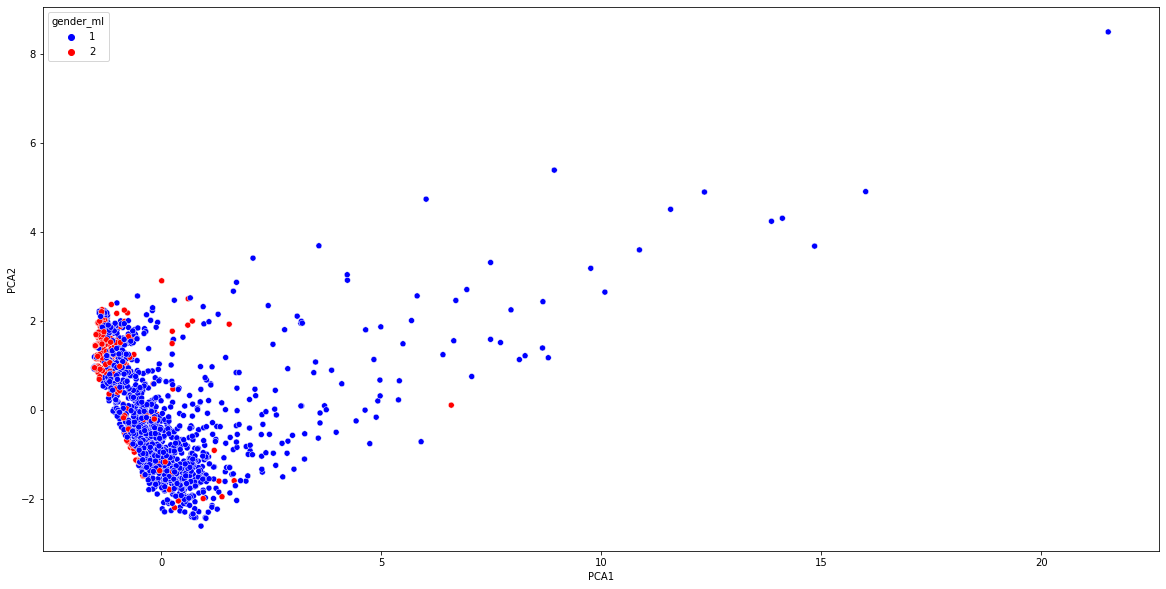

In [ ]:
plt.figure(figsize=(15,10))
sns.scatterplot(x = 'PCA1', y = 'PCA2', hue = 'gender_ml', data = pca_df, palette = ['blue','red'])